# MUN 87/3

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from mpl_toolkits.axes_grid1 import make_axes_locatable

# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [8]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/3'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# das Tiefe umgewandelt wird, führt dazu, dass die 6200 g ohne Tiefenangabe rausfallen!
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
#display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [10]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum, fill_value = 0)

In [11]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Greys')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
# lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-15_MUN87-3_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MUN 87/3** Fundverteilung

In [12]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-18_MUN87-3_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,Keramik,55,18.5,2.24,16.5
1,Ofenwand,7,2.4,0.00,0.0
2,Schlacke,195,65.7,10.35,76.5
3,Sonder,1,0.3,0.00,0.0
4,Stein,1,0.3,0.02,0.2
5,Tuyere,38,12.8,0.91,6.7


## Verteilung der Stilgruppen

In [14]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/3')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
df['Typ'] = df['Typ'].replace('','(?)')
df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
df = df.dropna(subset=['Tiefe'])
display(df.head(1))

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\pandas\core\common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,MUN,87/3/II,"-2-2-1,2,3,4:14, 15",PIKMUN,249,200,K,60


In [9]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum, fill_value = 0)

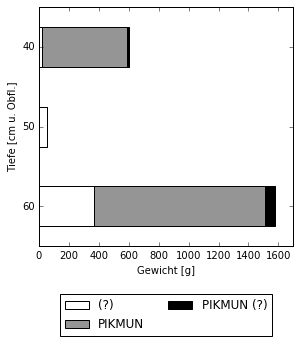

In [12]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Greys')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlim([0,1700]) 
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-15_MUN87-3_VerteilungStilgr.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **MUN 87/3** Verteilung der Stilgruppen

## Fragmentierung der Keramik

In [15]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/3')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head(1))

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,objID,bef_nr,Komplex,Gewicht,Gr_Clist,Art,Tiefe
0,428,87/3,87/3/II,249,200,K,60
1,429,87/3,87/3/II,124,200,K,60
2,434,87/3,87/3/II,469,200,K,40
3,435,87/3,87/3/II,94,120,K,40
4,1106,87/3,87/3/II,116,120,K,60


In [16]:
df_pivot = df.pivot_table(values = 'objID', index = 'Gr_Clist', aggfunc = len)
# Dummy-Werte manuell:
df_pivot['>200'] = 0.
df_pivot = pd.DataFrame(df_pivot)
# Prozent-Anteil
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
Gr_Clist,,
30,8,28.571429
70,11,39.285714
120,6,21.428571
200,3,10.714286
>200,0,0.000000


In [17]:
#fig = plt.gcf()
#fig.set_size_inches(6, 6, forward=True)
df_pivot['Prozent'].plot(kind = 'bar', color = 'gray')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Prozentanteil')
plt.ylim([0,42]) 
plt.tight_layout()
plt.savefig('../output/figs/9-15_MUN87-3_KeramikFragmentierung.pdf')
plt.show()

n

In [18]:
df_pivot['objID'].sum()

28.0

> **MUN 87/3** Fragmentierungsgrad

## Verzierungselemente

In [3]:
sql = """SELECT
            t_Obj.objID,
            t_K_Verz.verzName,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'MUN')
            AND ((t_Komplex.bef_nr) = '87/3')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head(1))

,objID,verzName,pos
0,428,01.2,2 Rand
1,428,02.1,6 Bauch
2,428,04.2,6 Bauch
3,428,01.6,6 Bauch
4,434,02.1,6 Bauch


In [4]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len, fill_value = 0)
df_pivot

verzName,01.1,01.2,01.3,01.6,02.1,02.2,02.3,02.4,04.15,04.2
pos,,,,,,,,,,
1 Innen,0,0,0,0,1,0,0,0,0,0
2 Rand,0,1,1,0,5,0,0,1,1,1
6 Bauch,3,0,2,2,10,4,1,1,0,3


In [5]:
df_pivot = df_pivot.sort_index(ascending=True)

In [6]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
# plt.rcdefaults()
#%matplotlib inline

In [7]:
# from matplotlib.gridspec import GridSpec

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


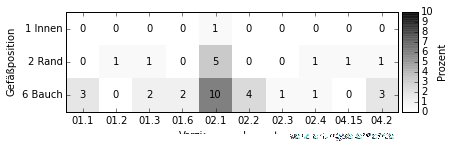

In [8]:
ax = plt.gca()

im = plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Prozent')

plt.savefig('../output/figs/9-15_MUN87-3_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **MUN 87/3** Verzierungselemente

n

In [18]:
df['objID'].nunique()

13

In [19]:
# pd.options.display.mpl_style = 'default'

## Schlacken

In [11]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Schlacke_Typ,
           t_Obj.Tiefe
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'MUN')
           AND ((t_Obj.Komplex) Like '%87/3%')
           AND (t_Obj.Art) Like '%S%'
           AND ((t_Obj.Schlacke_Typ) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
#df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Gewicht', index = ['Komplex', 'Tiefe'], columns = 'Schlacke_Typ', aggfunc = sum)
df_pivot

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Schlacke_Typ   1a  2a    2b   4b    5    6
Komplex Tiefe                             
87/3/I          2   7   NaN  NaN   12  NaN
        17-23 NaN NaN   NaN  NaN  137  NaN
87/3/II 30    NaN  37   114  NaN  137  NaN
        40    NaN NaN   722  NaN   44  112
        50    NaN NaN     9  NaN  NaN   79
        60    NaN  15  1495  541  141  543

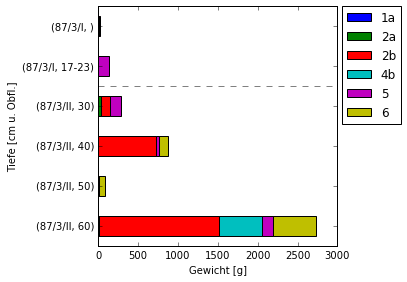

In [12]:
ax = df_pivot.plot(kind = 'barh', stacked=True)
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.axhline(1.5, color='grey', linestyle = '--')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.tight_layout()
plt.savefig('../output/figs/9-15_MUN87-3_Schlacken_B.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [13]:
# die im Gelände gelassene Schlacke hat keinen Schlacke_Typ
sql = """SELECT
           t_Obj.objID, 
           t_Obj.Gewicht
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'MUN')
           AND ((t_Obj.Komplex) = '87/3')
           AND (t_Obj.Art) Like '%S%')""".replace('\n',' ')

df1 = pd.read_sql(sql, con)
df1['Gewicht'] = df1['Gewicht'].convert_objects(convert_numeric=True)

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [14]:
a = pd.Series({'mitgenommene, repräsentative Stücke':np.sum(df['Gewicht']),'ungewaschen in Bamanya verblieben':np.sum(df1['Gewicht'])})
a

mitgenommene, repräsentative Stücke    4147
ungewaschen in Bamanya verblieben      6200
dtype: int64

In [15]:
fig = plt.figure(1)
fig.set_size_inches(5, 5)
a.plot(kind='pie', autopct='%.0f %%', colors = ('dimgrey', 'lightgrey'))
plt.ylabel('')
plt.savefig('../output/figs/9-15_MUN87-3_Schlacken_A.pdf', bbox_inches='tight')
plt.show()

In [16]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Schlacke_Typ', aggfunc = sum)
df_pivot

Schlacke_Typ
1a       2
2a      59
2b    2340
4b     541
5      471
6      734
Name: Gewicht, dtype: int64

In [17]:
df_pivot = pd.DataFrame(df_pivot)
perc_of_columns = df_pivot.apply(lambda x : x / x.sum() * 100, axis=0) 
perc_of_columns

,Gewicht
Schlacke_Typ,
1a,0.048228
2a,1.422715
2b,56.426332
4b,13.045575
5,11.357608
6,17.699542


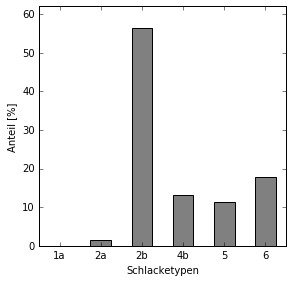

In [25]:
ax = perc_of_columns.plot(kind = 'bar', stacked=True, legend = None, color = 'grey')
plt.ylabel('Anteil [%]')
plt.xlabel('Schlacketypen')
plt.xticks(rotation=0)
plt.ylim(0,62)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1] + 2)))
plt.tight_layout()
plt.savefig('../output/figs/9-15_MUN87-3_Schlacken_C.pdf', bbox_inches='tight')
plt.show()